# Final analysis

This notebook contains final data processing steps, Data visualization and model fitting



# Data processing

In [1]:
import geopandas as gp

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Inspect data and do last data preprocessing

* do last steps to clean up data extracting numerical quantities as floats.
* one hot encode type (e.g Flat, Terraced)
* compute distance from the centre of London (Picadilly circus)

In [3]:
dfjan = pd.read_csv('All_Info_processing_200k_1m500k.csv')

In [4]:
dfmarch = pd.read_csv('March23_All_Info_processing_200k_1m500k.csv')

In [5]:
df = dfjan.append(dfmarch)

/tmp/ipykernel_5344/3877394401.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = dfjan.append(dfmarch)


In [6]:
len(df)

22196

In [7]:
df[['long_lat', 'area', 'price','n_bathrooms','n_bedrooms', 'stations', 'type']].dropna().head()

,long_lat,area,price,n_bathrooms,n_bedrooms,stations,type
0,51.5145899_-0.1636312,4764.0,"£9,250,000Knowing the purchase price means you...",×6,×5,Marble Arch Station0.2 milesEdgware Road (Circ...,Terraced
1,51.5144767_-0.2078933,560.0,"£500,000Knowing the purchase price means you c...",×1,×1,Ladbroke Grove Station0.1 milesLatimer Road St...,Flat
2,51.5253947_-0.1841597,978.0,"£1,175,000Knowing the purchase price means you...",×2,×2,Warwick Avenue Station0.2 milesMaida Vale Stat...,Flat
3,51.4396143_-0.1313659,2196.0,"£1,250,000Knowing the purchase price means you...",×3,×5,Streatham Hill Station0.3 milesStreatham Stati...,Semi-Detached
4,51.4666911_-0.0985873,1057.0,"£750,000Knowing the purchase price means you c...",×1,×3,Loughborough Junction Station0.2 milesDenmark ...,End of Terrace


In [8]:
dfsel = df[['long_lat', 'area', 'price','n_bathrooms','n_bedrooms', 'stations', 'type']].dropna()

In [9]:
dfsel['price']

0        £9,250,000Knowing the purchase price means you...
1        £500,000Knowing the purchase price means you c...
2        £1,175,000Knowing the purchase price means you...
3        £1,250,000Knowing the purchase price means you...
4        £750,000Knowing the purchase price means you c...
                               ...                        
13854    £280,000Knowing the purchase price means you c...
13855    £400,000Knowing the purchase price means you c...
13856    £630,000Knowing the purchase price means you c...
13857    £320,000Knowing the purchase price means you c...
13858    £850,000Knowing the purchase price means you c...
Name: price, Length: 21286, dtype: object

In [10]:
dfsel['price']

0        £9,250,000Knowing the purchase price means you...
1        £500,000Knowing the purchase price means you c...
2        £1,175,000Knowing the purchase price means you...
3        £1,250,000Knowing the purchase price means you...
4        £750,000Knowing the purchase price means you c...
                               ...                        
13854    £280,000Knowing the purchase price means you c...
13855    £400,000Knowing the purchase price means you c...
13856    £630,000Knowing the purchase price means you c...
13857    £320,000Knowing the purchase price means you c...
13858    £850,000Knowing the purchase price means you c...
Name: price, Length: 21286, dtype: object

In [11]:

import numpy as np
import re
def min_distance(s):
    distance_strings = re.findall('\d.\d', s.lower())
    distances = np.array([float(x) for x in distance_strings])
    return np.min(distances)

def mean_distance(s):
    distance_strings = re.findall('\d.\d', s.lower())
    distances = np.array([float(x) for x in distance_strings])
    return np.mean(distances)

def price(s):
    price = re.findall('\d*,\d*,\d*', s.lower())
    if len(price) > 0:
        return float(price[0].replace(',',''))
    else:
        price = re.findall('\d*,\d*', s.lower())
        return float(price[0].replace(',',''))

In [12]:
dfsel['min_distance_to_station'] = dfsel['stations'].dropna().apply(min_distance)
dfsel['mean_distance_to_station'] = dfsel['stations'].dropna().apply(mean_distance)

In [13]:
dfsel['n_bedrooms_proc']=dfsel['n_bedrooms'].apply(lambda x : int(x[-1]))

In [14]:
dfsel['n_bathrooms_proc']=dfsel['n_bathrooms'].apply(lambda x : int(x[-1]))

In [15]:
dfsel['long']=dfsel['long_lat'].apply(lambda x : float(x.split('_')[-1]))

In [16]:
dfsel['lat']=dfsel['long_lat'].apply(lambda x : float(x.split('_')[0]))

In [17]:
dfsel['price'] = dfsel['price'].apply(price)

In [18]:
len(dfsel)

21286

In [19]:
# view data counts for flat types
dfsel.type.value_counts()

Flat                      7111
Apartment                 3893
Terraced                  2781
Semi-Detached             2492
Detached                  1580
End of Terrace             729
House                      679
Maisonette                 578
Bungalow                   243
Semi-Detached Bungalow     187
Link Detached House        177
Ground Flat                175
Duplex                     111
Detached Bungalow           94
Town House                  73
Retirement Property         72
Penthouse                   59
Ground Maisonette           38
Cottage                     30
Chalet                      28
Character Property          27
Country House               26
Parking                     26
Cluster House               26
Mews                        21
Block of Apartments         15
Terraced Bungalow           13
Park Home                    1
Coach House                  1
Name: type, dtype: int64

In [20]:
np.unique(dfsel.type)

array(['Apartment', 'Block of Apartments', 'Bungalow', 'Chalet',
       'Character Property', 'Cluster House', 'Coach House', 'Cottage',
       'Country House', 'Detached', 'Detached Bungalow', 'Duplex',
       'End of Terrace', 'Flat', 'Ground Flat', 'Ground Maisonette',
       'House', 'Link Detached House', 'Maisonette', 'Mews', 'Park Home',
       'Parking', 'Penthouse', 'Retirement Property', 'Semi-Detached',
       'Semi-Detached Bungalow', 'Terraced', 'Terraced Bungalow',
       'Town House'], dtype=object)

In [21]:
# set all remaining flat types to other
def flat_type(flat):
    if flat in ['Flat', 'Apartment', 'End of Terrace' , 'Terraced', 'House' ,'Maisonette',
                'Terraced', 'Ground Flat' , 'Semi-Detached', 'Bungalow']:
        return flat
    else:
        return "other"


    

In [22]:
dfsel['type'] = dfsel.type.apply(flat_type)

In [23]:
q = 'Piccadilly Circus, London WIJ 9HP'

In [24]:
import googlemaps
from datetime import datetime

#gmaps = googlemaps.Client(key='')

# Geocoding an address

q = 'Piccadilly Circus, London WIJ 9HP'
#q = 'Cromwell Rd, South Kensington, London SW7 5BD, UK'
#geocode_result = gmaps.geocode(q)

In [25]:
# coordinates of Picadilly Circus from google maps using similar code to above
# API key removed from this notebook
# result from API query shown below

geocode_result = [{'address_components': [{'long_name': 'Piccadilly Circus',
    'short_name': 'Piccadilly Circus',
    'types': ['route']},
   {'long_name': 'London', 'short_name': 'London', 'types': ['postal_town']},
   {'long_name': 'Greater London',
    'short_name': 'Greater London',
    'types': ['administrative_area_level_2', 'political']},
   {'long_name': 'England',
    'short_name': 'England',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'United Kingdom',
    'short_name': 'GB',
    'types': ['country', 'political']},
   {'long_name': 'W1B',
    'short_name': 'W1B',
    'types': ['postal_code', 'postal_code_prefix']}],
  'formatted_address': 'Piccadilly Circus, London W1B, UK',
  'geometry': {'bounds': {'northeast': {'lat': 51.5101671, 'lng': -0.1346248},
    'southwest': {'lat': 51.5098384, 'lng': -0.1352218}},
   'location': {'lat': 51.5099734, 'lng': -0.13497},
   'location_type': 'GEOMETRIC_CENTER',
   'viewport': {'northeast': {'lat': 51.5113517302915,
     'lng': -0.133574319708498},
    'southwest': {'lat': 51.5086537697085, 'lng': -0.136272280291502}}},
  'place_id': 'ChIJwR8g_9MEdkgR_rI--wzfivA',
  'types': ['route']}]

In [26]:
picad_coords = (geocode_result[0]['geometry']['location']['lat'], geocode_result[0]['geometry']['location']['lng'])

In [27]:
# Compute distance from the centre of London

import geopy.distance

dfsel['distance'] = dfsel.apply(lambda x : geopy.distance.distance((x.lat,x.long), picad_coords).km, axis = 1)


# Data Visualization

### Property locations

Below code is used to plot the properties on top of a map of London. The price is reflected by size and colour of the points

In [28]:
ldnwards = gp.read_file('london_wards_2011_wgs84.shp')
ldnwards.head()

,geometry
0,"POLYGON ((-0.09740 51.52159, -0.09730 51.52158..."
1,"POLYGON ((-0.07786 51.51581, -0.07730 51.51545..."
2,"POLYGON ((-0.09110 51.51804, -0.09002 51.51780..."
3,"POLYGON ((-0.08034 51.50801, -0.08052 51.50806..."
4,"POLYGON ((-0.07847 51.52151, -0.07873 51.52104..."


In [29]:
dfmap = dfsel.query('distance < 50 ')

In [30]:
dfmap.long

0       -0.163631
1       -0.207893
2       -0.184160
3       -0.131366
4       -0.098587
           ...   
13854   -0.453333
13855   -0.450055
13856   -0.007694
13857   -0.547032
13858   -0.177324
Name: long, Length: 19790, dtype: float64

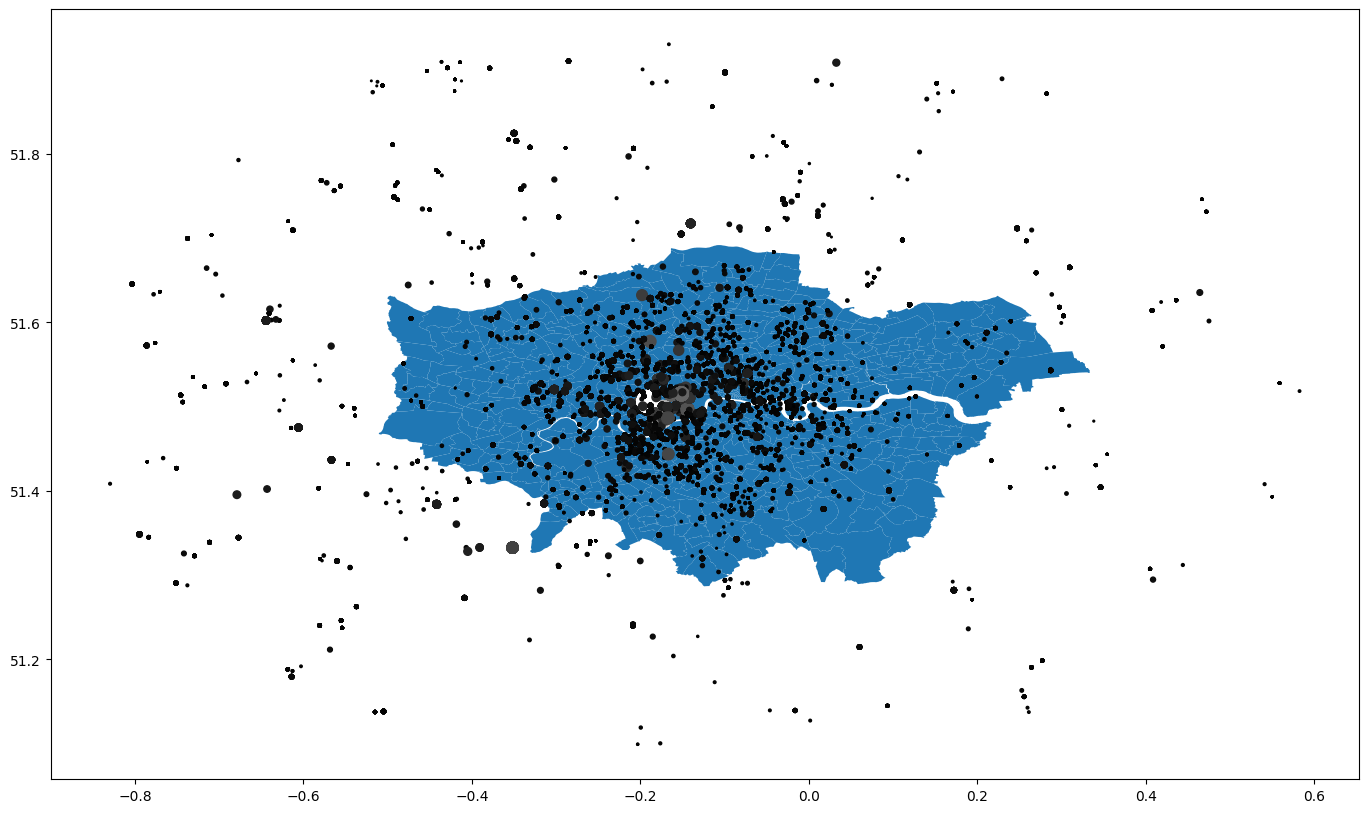

<Figure size 640x480 with 0 Axes>

In [31]:
#Ploting georgraphical boundaries of london wards
ldnwards.plot( figsize=(40,10))
plt.scatter(dfmap.long, dfmap.lat ,s=dfmap.price/(1e5),c=dfmap.price/(1e5), cmap='gray')

plt.show()
plt.savefig("london.png",dpi=300)

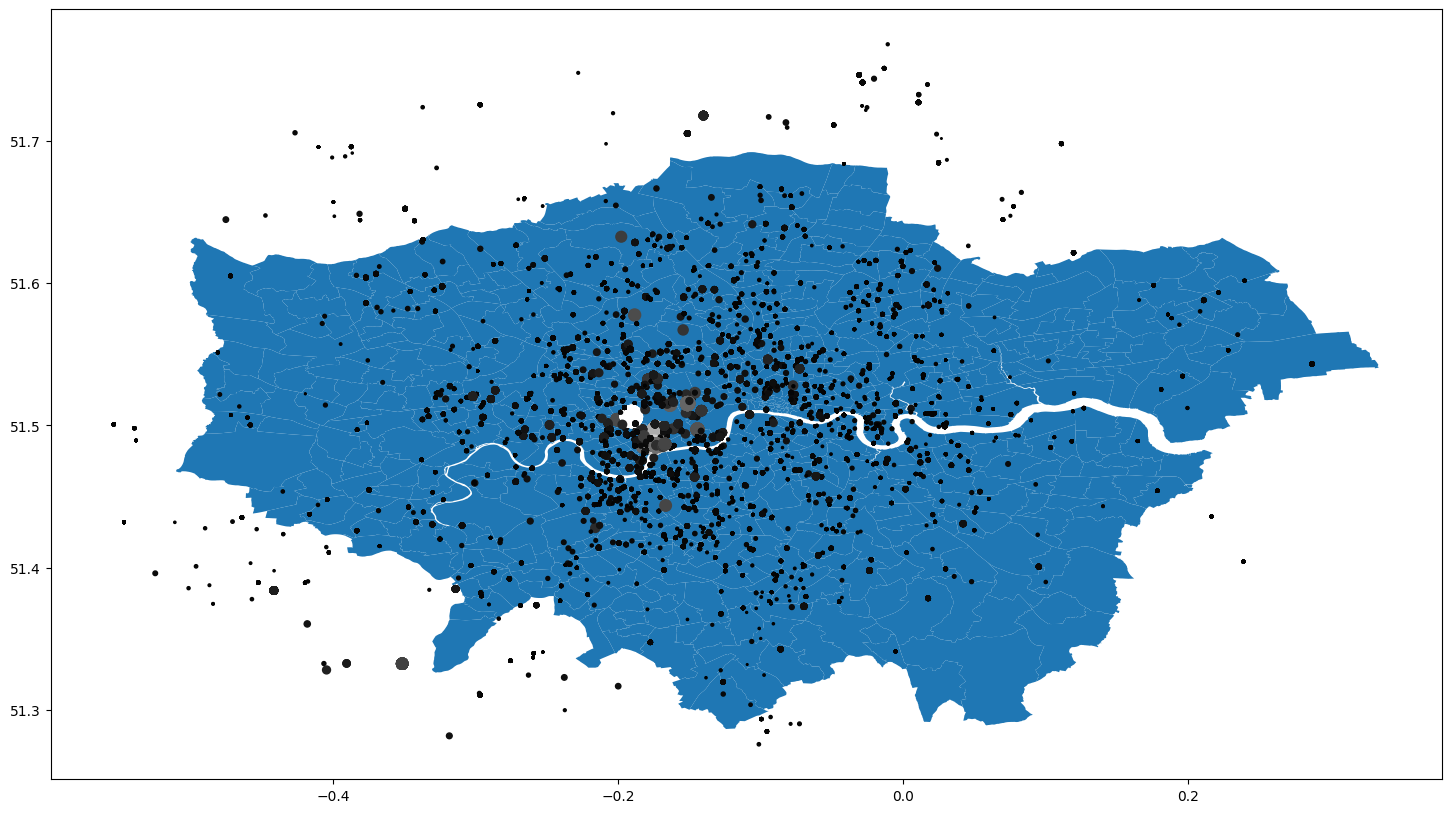

In [32]:
#Ploting georgraphical boundaries of london wards
dfmap = dfsel.query('distance < 30 ')
ldnwards.plot( figsize=(40,10))
plt.scatter(dfmap.long, dfmap.lat ,s=dfmap.price/(1e5),c=dfmap.price/(1e5), cmap='gray')

plt.show()

### Visualization of Price dependence on various features

In order to better understand the data I made a range of visualizations including 

* basic histograms to see the distribution of key features and the price
* seaborn regression plot to see the dependence of between prices and key features
* violin plots for categorical variables such as property type

Text(0, 0.5, 'Number of properties')

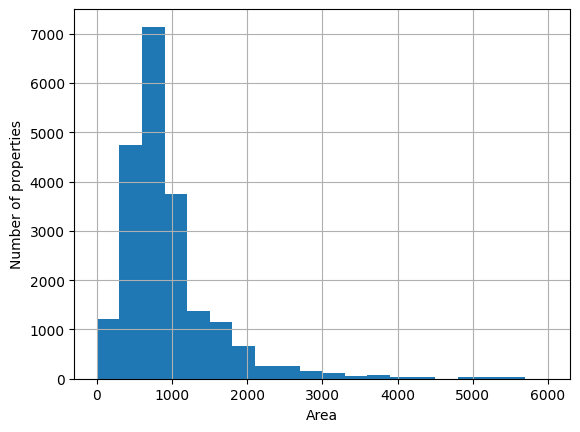

In [33]:
# select area > 200 to remove cases where area extraction failed causing the peak at area = 0
dfsel.area.hist(range=(0,6000),bins=20)
plt.xlabel('Area')
plt.ylabel('Number of properties')

There is peak at zero in area caused by an incorrect determination of the property size in square feet due to it being extracted from the property plans hence later I use a selection of > 200 in Area

Text(0, 0.5, 'Number of properties')

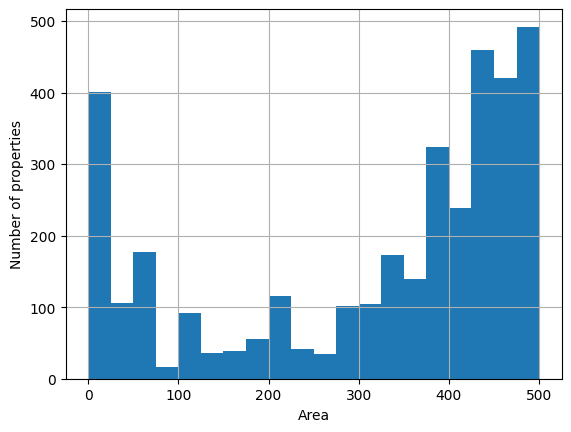

In [34]:
# select area > 200 to remove cases where area extraction failed causing the peak at area = 0
dfsel.area.hist(range=(0,500),bins=20)
plt.xlabel('Area')
plt.ylabel('Number of properties')

Text(0, 0.5, 'Number of properties')

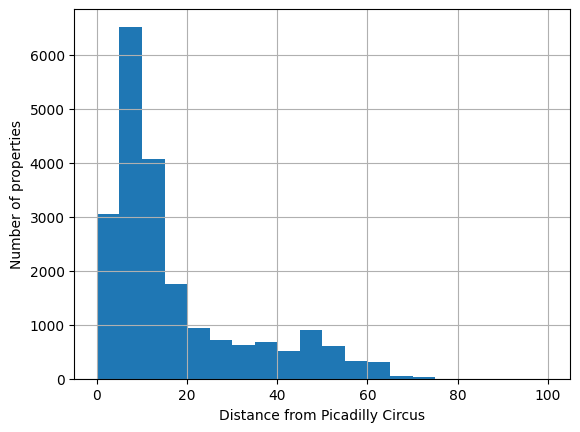

In [35]:
# select area > 200 to remove cases where area extraction failed causing the peak at area = 0
dfsel.distance.hist(range=(0,100),bins=20)
plt.xlabel('Distance from Picadilly Circus')
plt.ylabel('Number of properties')

Text(0, 0.5, 'Number of properties')

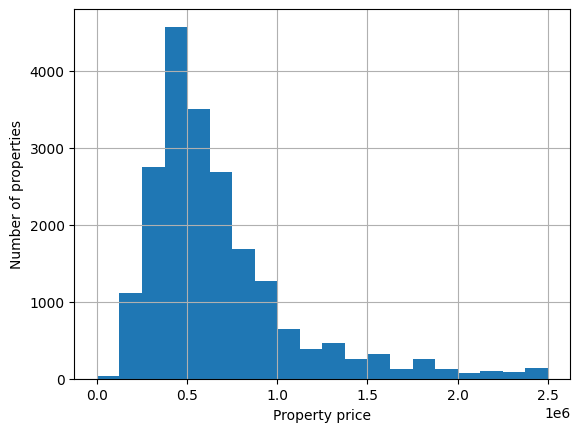

In [36]:
# select area > 200 to remove cases where area extraction failed causing the peak at area = 0
dfsel.price.hist(range=(0,2500000),bins=20)
plt.xlabel('Property price')
plt.ylabel('Number of properties')

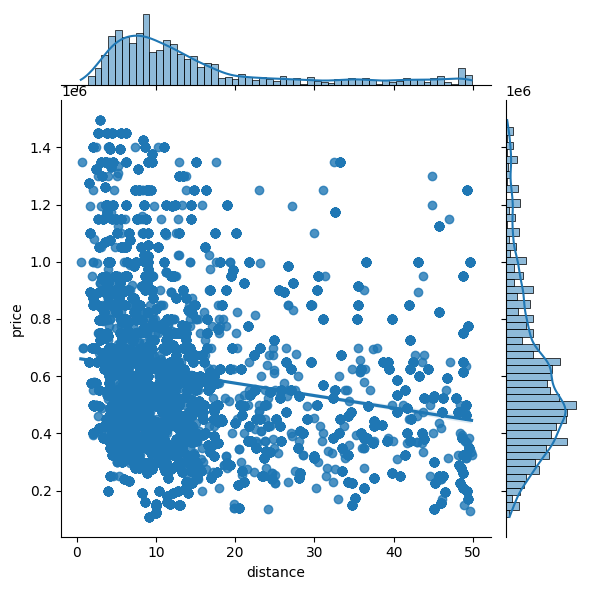

In [37]:
import seaborn as sns
g = sns.JointGrid(x="distance", y="price", 
                  data=dfsel.query(' 200 < area < 6000 and price < 1500000 and distance < 50'))

g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)


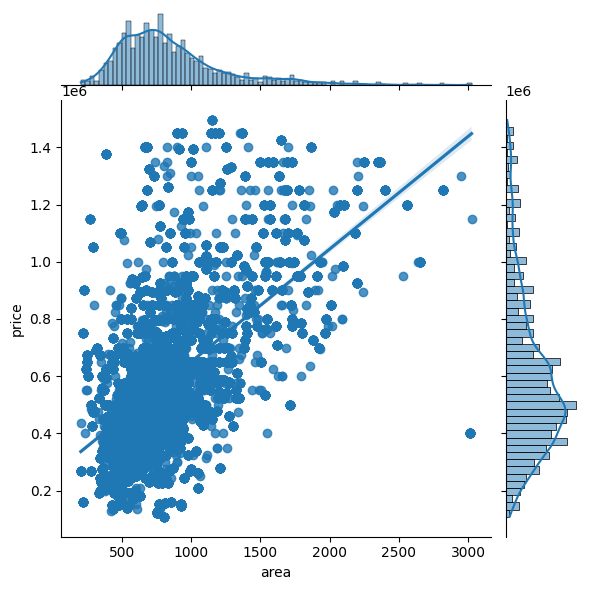

In [38]:
import seaborn as sns
g = sns.JointGrid(x="area", y="price", 
                  data=dfsel.query(' 200 < area < 4000 and price < 1500000 and distance < 50'))

g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)


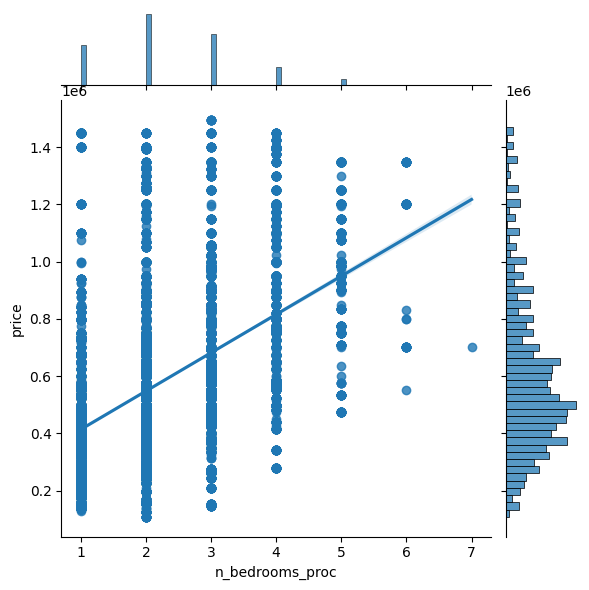

In [39]:
import seaborn as sns
g = sns.JointGrid(x="n_bedrooms_proc", y="price", 
                  data=dfsel.query(' 200 < area < 4000 and price < 1500000 and distance < 50'))

g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot)

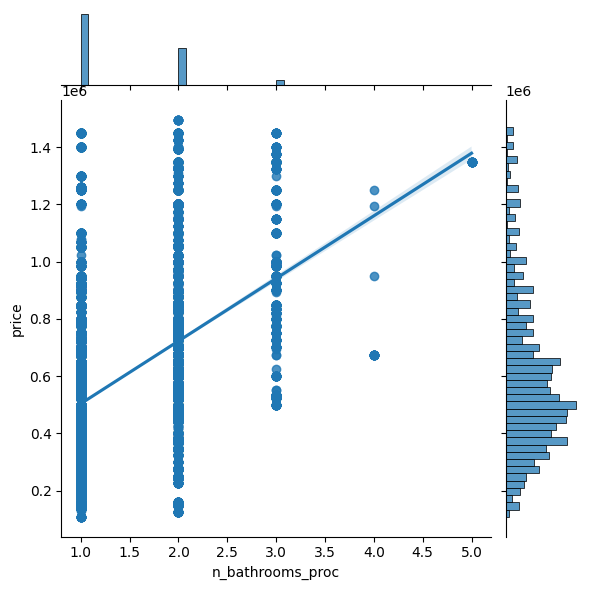

In [40]:
import seaborn as sns
g = sns.JointGrid(x="n_bathrooms_proc", y="price", 
                  data=dfsel.query(' 200 < area < 4000 and price < 1500000 and distance < 50'))

g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Flat'),
  Text(1, 0, 'Semi-Detached'),
  Text(2, 0, 'End of Terrace'),
  Text(3, 0, 'Apartment'),
  Text(4, 0, 'Terraced'),
  Text(5, 0, 'Maisonette'),
  Text(6, 0, 'House'),
  Text(7, 0, 'other'),
  Text(8, 0, 'Ground Flat'),
  Text(9, 0, 'Bungalow')])

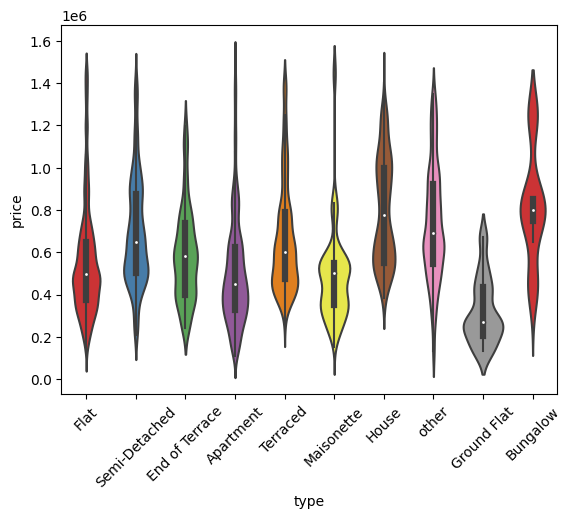

In [41]:
g = sns.violinplot(x="type", y="price", data=dfsel.query(' 200 < area < 4000 and price < 1500000 and distance < 50'),palette='Set1')
plt.xticks(rotation=45)

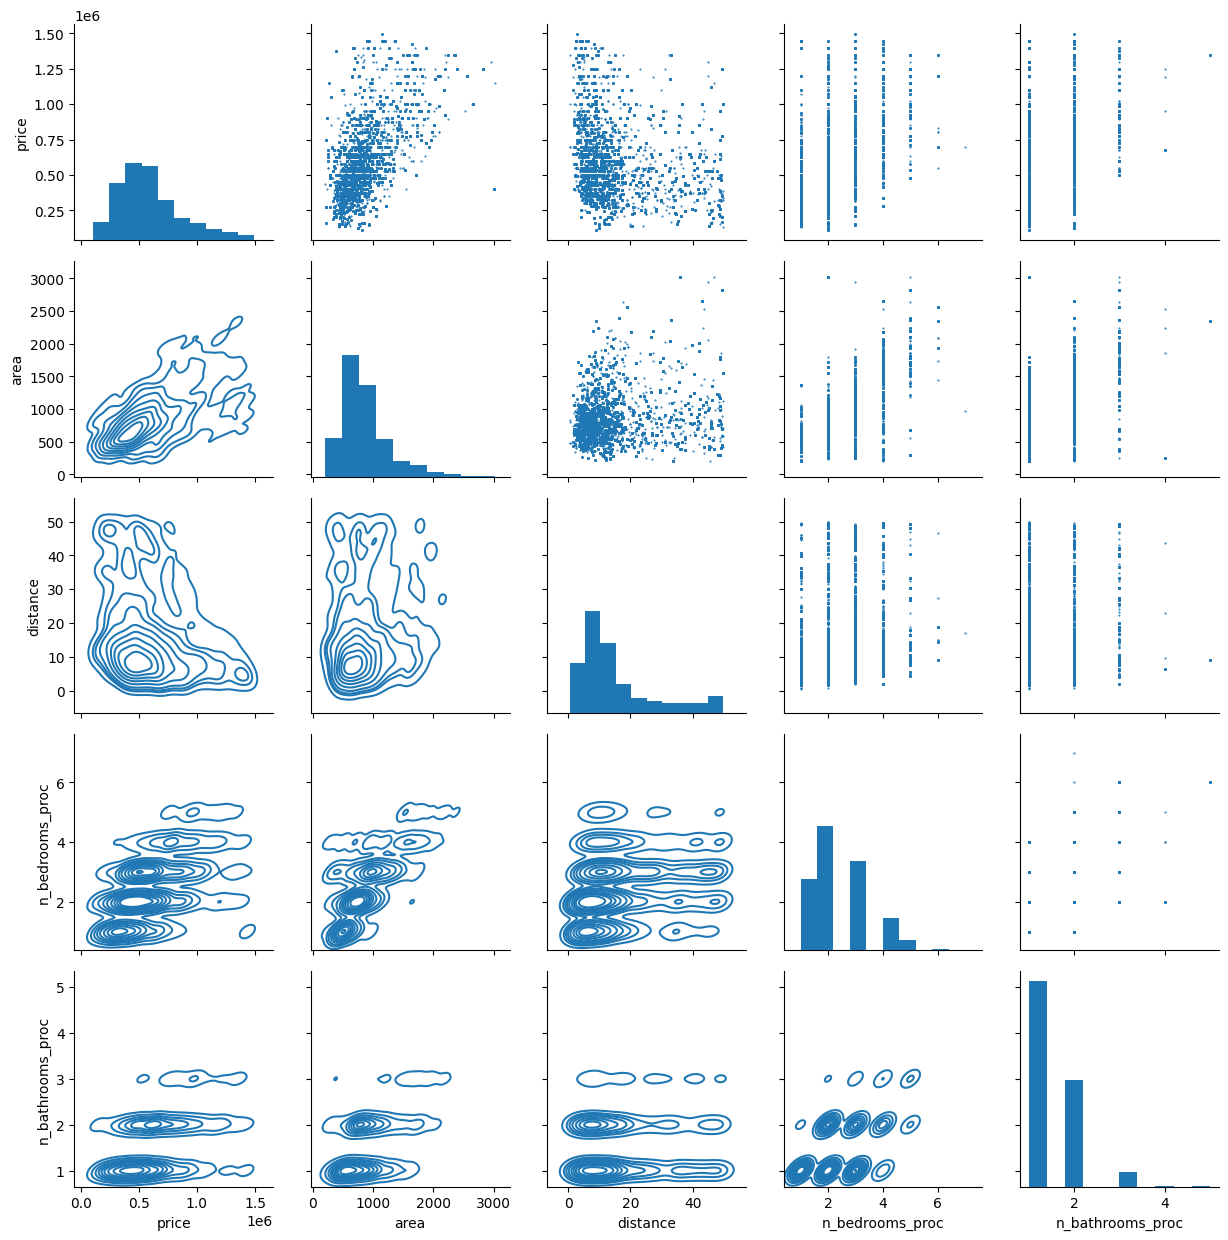

In [42]:
plt.rcParams['lines.markersize'] = 0.5
g = sns.PairGrid(
    dfsel[['price','area','distance','n_bedrooms_proc','n_bathrooms_proc']].query(' 200 < area < 4000 and price < 1500000 and distance < 50'))
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

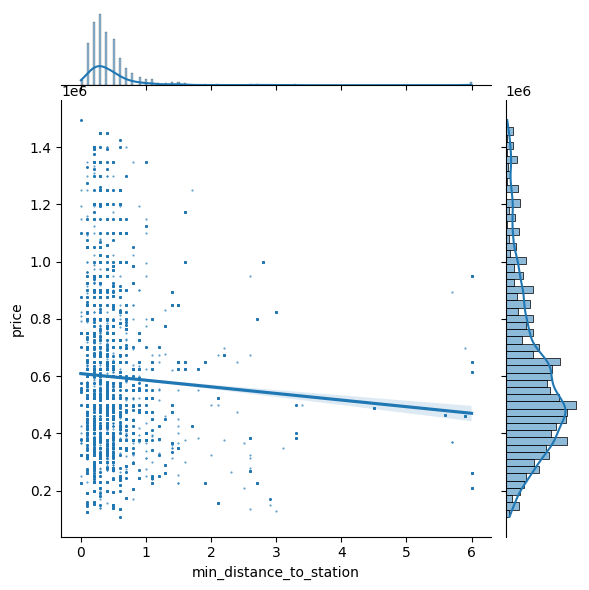

In [43]:
import seaborn as sns
g = sns.JointGrid(x="min_distance_to_station", y="price", 
                  data=dfsel.query(' 200 < area < 4000 and price < 1500000 and distance < 50'))

g.plot_joint(sns.regplot)
g.plot_marginals(sns.histplot, kde=True)

<Axes: >

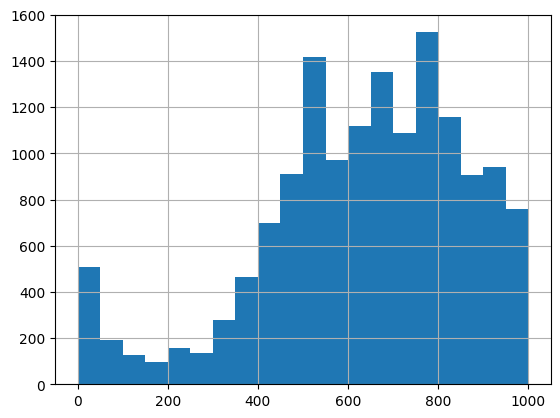

In [44]:
# select area > 200 to remove cases where area extraction failed causing the peak at area = 0
dfsel.area.hist(range=(0,1000),bins=20)

<Axes: >

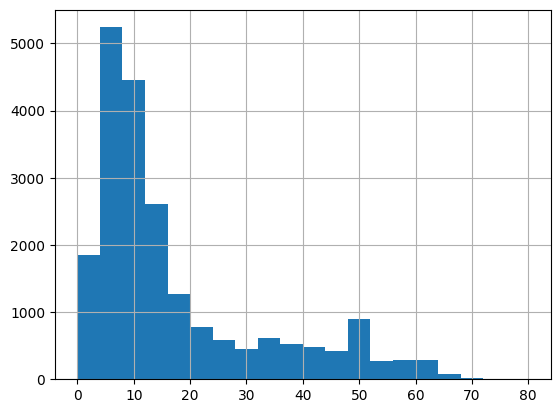

In [45]:
dfsel.distance.hist(range=(0,80),bins=20)

<Axes: >

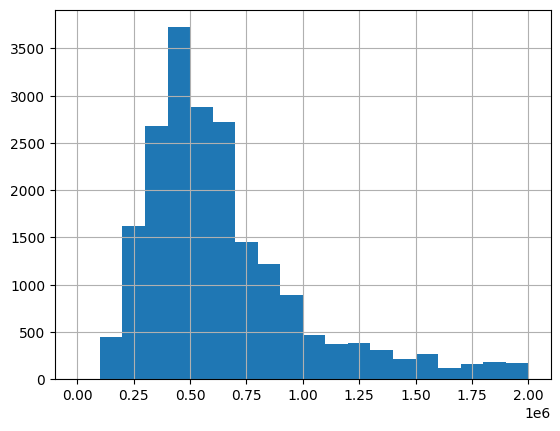

In [46]:
dfsel.price.hist(range=(0,2e6),bins=20)

# Model Building

## Prepare datasets for model training

In [47]:
dffinal = dfsel.query(' 200 < area < 6000 and price < 2000000 and distance < 70')
y = dffinal['price'].values

dffinal = dffinal.drop(['stations','n_bathrooms', 'n_bedrooms','price','long_lat'], axis=1)

In [48]:
# use get_dummies to one hot encode property type
pd.get_dummies(dffinal)

,area,min_distance_to_station,mean_distance_to_station,n_bedrooms_proc,n_bathrooms_proc,long,lat,distance,type_Apartment,type_Bungalow,type_End of Terrace,type_Flat,type_Ground Flat,type_House,type_Maisonette,type_Semi-Detached,type_Terraced,type_other
1,560.0,0.1,0.333333,1,1,-0.207893,51.514477,5.087209,0,0,0,1,0,0,0,0,0,0
2,978.0,0.2,0.333333,2,2,-0.184160,51.525395,3.821277,0,0,0,1,0,0,0,0,0,0
3,2196.0,0.3,0.733333,5,3,-0.131366,51.439614,7.831971,0,0,0,0,0,0,0,1,0,0
4,1057.0,0.2,0.433333,3,1,-0.098587,51.466691,5.438292,0,0,1,0,0,0,0,0,0,0
5,785.0,0.1,0.333333,2,2,-0.207833,51.496634,5.272443,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13854,1207.0,0.5,1.833333,4,1,-0.453333,51.898707,48.528531,0,0,1,0,0,0,0,0,0,0
13855,884.0,0.5,1.433333,3,2,-0.450055,51.733916,33.120418,0,0,0,0,0,0,0,0,1,0
13856,732.0,0.3,0.433333,2,2,-0.007694,51.497598,8.944016,1,0,0,0,0,0,0,0,0,0
13857,667.0,0.1,1.266667,1,1,-0.547032,51.431958,29.918635,0,0,0,1,0,0,0,0,0,0


In [49]:
# use get_dummies to one hot encode 

X = pd.get_dummies(dffinal).values
X = X /np.max(X,axis=0)
#X = dffinal[['n_bedrooms_proc','n_bathrooms_proc', 'area','distance']].values


In [50]:
dfsel.shape

(21286, 14)

In [51]:
import numpy as np
from sklearn.linear_model import LinearRegression


In [52]:
mreg = LinearRegression().fit(X, y)
mreg.score(X, y)


0.5369924009216023

In [53]:
len(y)

19045

### Split data in validation, test and train

use about 5\% of the data as a test set saved for after a models have been optimized and roughly 5\% as a validation set

In [54]:
from sklearn.model_selection import train_test_split
Xtrainval, Xtest, ytrainval, ytest = train_test_split(
     X, y, test_size=0.05, random_state=42)


In [55]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(
     Xtrainval, ytrainval, test_size=0.05, random_state=40)


## Models


### scikit learn regressors

Try some first base models with scikit learn

* linear regression
* a gradient boosted regressor
* a feed forward network

In [56]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

valperf = {}

trainperf = {}

In [57]:

def compute_perf(ytrue, ypred, set="Train"):
    perf = {}
    perf['r2'] = r2_score(ytrue, ypred)
    perf['MAPE [%]'] = 100* mean_absolute_percentage_error(ytrue, ypred)
    perf['MAE'] = mean_absolute_error(ytrue, ypred)
    perf['MSE'] = mean_squared_error(ytrue, ypred)
    print(f"{set} performance ", perf)
    return perf

In [58]:
mreg = LinearRegression().fit(Xtrain, ytrain)
print(f" Train score: {mreg.score(Xtrain, ytrain)} and Val score: {mreg.score(Xval, yval)}")

 Train score: 0.5364217060075083 and Val score: 0.5575532363077759


In [59]:
trainperf['Linear reg.'] = compute_perf(ytrain, mreg.predict(Xtrain))

Train performance  {'r2': 0.5364217060075083, 'MAPE [%]': 30.438624777991524, 'MAE': 163385.66503752838, 'MSE': 56658892113.01699}


In [60]:
valperf['Linear reg.'] = compute_perf(yval, mreg.predict(Xval), "Val")

Val performance  {'r2': 0.5575532363077759, 'MAPE [%]': 28.258714010436197, 'MAE': 155209.92707182321, 'MSE': 49433016125.478455}


In [61]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0,n_estimators=1000,learning_rate=0.01,  max_depth=3
                               ,min_samples_split=40, min_samples_leaf=40)
reg.fit(Xtrain, ytrain)


print(f" Train score: {reg.score(Xtrain, ytrain)} and Val score: {reg.score(Xval, yval)}")

 Train score: 0.8450768948906419 and Val score: 0.8394682803701853


In [62]:
trainperf['grad boosting reg.'] = compute_perf(ytrain, reg.predict(Xtrain))

Train performance  {'r2': 0.8450768948906419, 'MAPE [%]': 17.936869686600467, 'MAE': 95526.55995357977, 'MSE': 18934819882.543686}


In [63]:
valperf['grad boosting reg.'] = compute_perf(yval, reg.predict(Xval), "Val")

Val performance  {'r2': 0.8394682803701853, 'MAPE [%]': 16.256976499887422, 'MAE': 92443.14441929315, 'MSE': 17935642740.132183}


It seems already that BDTs look a promising approach.


In [64]:
valperf

{'Linear reg.': {'r2': 0.5575532363077759,
  'MAPE [%]': 28.258714010436197,
  'MAE': 155209.92707182321,
  'MSE': 49433016125.478455},
 'grad boosting reg.': {'r2': 0.8394682803701853,
  'MAPE [%]': 16.256976499887422,
  'MAE': 92443.14441929315,
  'MSE': 17935642740.132183}}

In [65]:
from sklearn.neural_network import MLPRegressor

In [66]:
nnreg = MLPRegressor(hidden_layer_sizes=(128,64,32,16), learning_rate_init=0.01).fit(Xtrain, ytrain)
nnreg.score(Xtrain, ytrain)

0.9015439549944559

In [67]:
nnreg.score(Xval, yval)

0.8956655223378185

In [68]:
print(f"Linear regression mean pecentage difference: {100*np.sum(np.abs(nnreg.predict(Xval)-yval)/yval)/ len(yval)} %")

Linear regression mean pecentage difference: 12.526009739976102 %


In [69]:
trainperf['MLP reg.'] = compute_perf(ytrain, reg.predict(Xtrain))

valperf['MLP reg.'] = compute_perf(yval, reg.predict(Xval), "Val")

Train performance  {'r2': 0.8450768948906419, 'MAPE [%]': 17.936869686600467, 'MAE': 95526.55995357977, 'MSE': 18934819882.543686}
Val performance  {'r2': 0.8394682803701853, 'MAPE [%]': 16.256976499887422, 'MAE': 92443.14441929315, 'MSE': 17935642740.132183}


In [70]:
valperf

{'Linear reg.': {'r2': 0.5575532363077759,
  'MAPE [%]': 28.258714010436197,
  'MAE': 155209.92707182321,
  'MSE': 49433016125.478455},
 'grad boosting reg.': {'r2': 0.8394682803701853,
  'MAPE [%]': 16.256976499887422,
  'MAE': 92443.14441929315,
  'MSE': 17935642740.132183},
 'MLP reg.': {'r2': 0.8394682803701853,
  'MAPE [%]': 16.256976499887422,
  'MAE': 92443.14441929315,
  'MSE': 17935642740.132183}}

### Standard feed forward network with tensorflow's Keras api

Here its possible to experiment with different losses such a the mean aabsolute percentage error, mean squared error, mean absolute error.

"l2" regularisation is employed to avoid overfitting. Also after 200 epochs the learning rate is dropped by a factor of 0.1 and then again 20 epochs later.

In [71]:
import tensorflow as tf

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=10, min_lr=0.001)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile( loss = tf.keras.losses.mean_squared_error,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), 
              metrics = ['mape'])
model_hist1 = model.fit( Xtrain, ytrain, epochs = 200,validation_data=(Xval,yval)) #, callbacks=[reduce_lr],
                      #batch_size=128)



2023-03-19 11:21:46.167666: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 11:21:46.301417: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-19 11:21:46.355009: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-19 11:21:46.910475: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

Epoch 1/200


2023-03-19 11:21:47.386452: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-19 11:21:47.418433: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-19 11:21:47.418560: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-19 11:21:47.419166: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

116/538 [=====>........................] - ETA: 0s - loss: 156376694784.0000 - mape: 52.4864

2023-03-19 11:21:48.955141: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


538/538 [==============================] - 2s 1ms/step - loss: 77118537728.0000 - mape: 33.1402 - val_loss: 40061186048.0000 - val_mape: 24.9861
Epoch 2/200
538/538 [==============================] - 1s 1ms/step - loss: 44533899264.0000 - mape: 24.9700 - val_loss: 40764518400.0000 - val_mape: 20.7744
Epoch 3/200
538/538 [==============================] - 1s 1ms/step - loss: 40723042304.0000 - mape: 23.8096 - val_loss: 34816364544.0000 - val_mape: 19.6310
Epoch 4/200
538/538 [==============================] - 1s 1ms/step - loss: 40442810368.0000 - mape: 23.6839 - val_loss: 32339664896.0000 - val_mape: 20.9067
Epoch 5/200
538/538 [==============================] - 1s 1ms/step - loss: 38599491584.0000 - mape: 23.2590 - val_loss: 32954904576.0000 - val_mape: 22.1201
Epoch 6/200
538/538 [==============================] - 1s 1ms/step - loss: 36150370304.0000 - mape: 22.6717 - val_loss: 30924466176.0000 - val_mape: 21.8584
Epoch 7/200
538/538 [==============================] - 1s 1ms/step - l

Epoch 53/200
538/538 [==============================] - 1s 1ms/step - loss: 12214625280.0000 - mape: 14.5874 - val_loss: 9499535360.0000 - val_mape: 12.0803
Epoch 54/200
538/538 [==============================] - 1s 1ms/step - loss: 11528820736.0000 - mape: 14.1286 - val_loss: 9962126336.0000 - val_mape: 12.7575
Epoch 55/200
538/538 [==============================] - 1s 1ms/step - loss: 11347927040.0000 - mape: 14.1071 - val_loss: 10473122816.0000 - val_mape: 12.1736
Epoch 56/200
538/538 [==============================] - 1s 1ms/step - loss: 11795462144.0000 - mape: 14.1934 - val_loss: 10097067008.0000 - val_mape: 12.3188
Epoch 57/200
538/538 [==============================] - 1s 1ms/step - loss: 10544251904.0000 - mape: 13.5520 - val_loss: 9529451520.0000 - val_mape: 13.3680
Epoch 58/200
538/538 [==============================] - 1s 1ms/step - loss: 10640809984.0000 - mape: 13.5317 - val_loss: 9556202496.0000 - val_mape: 11.6811
Epoch 59/200
538/538 [==============================] - 

538/538 [==============================] - 1s 1ms/step - loss: 4050429184.0000 - mape: 8.1827 - val_loss: 5366227968.0000 - val_mape: 8.8838
Epoch 106/200
538/538 [==============================] - 1s 1ms/step - loss: 4523505664.0000 - mape: 8.5925 - val_loss: 5707103232.0000 - val_mape: 9.0246
Epoch 107/200
538/538 [==============================] - 1s 1ms/step - loss: 3550902784.0000 - mape: 7.6608 - val_loss: 4195462912.0000 - val_mape: 8.0406
Epoch 108/200
538/538 [==============================] - 1s 1ms/step - loss: 3909177344.0000 - mape: 7.9212 - val_loss: 5339627520.0000 - val_mape: 9.0213
Epoch 109/200
538/538 [==============================] - 1s 1ms/step - loss: 3729177600.0000 - mape: 7.8632 - val_loss: 3885111040.0000 - val_mape: 7.1355
Epoch 110/200
538/538 [==============================] - 1s 1ms/step - loss: 4259920896.0000 - mape: 8.2929 - val_loss: 4741282816.0000 - val_mape: 8.0717
Epoch 111/200
538/538 [==============================] - 1s 1ms/step - loss: 3749541

Epoch 158/200
538/538 [==============================] - 1s 1ms/step - loss: 2284675584.0000 - mape: 5.7904 - val_loss: 2610705664.0000 - val_mape: 5.3279
Epoch 159/200
538/538 [==============================] - 1s 1ms/step - loss: 2190790656.0000 - mape: 5.8143 - val_loss: 4834759680.0000 - val_mape: 7.8778
Epoch 160/200
538/538 [==============================] - 1s 2ms/step - loss: 2380834048.0000 - mape: 5.9291 - val_loss: 2524588288.0000 - val_mape: 4.6990
Epoch 161/200
538/538 [==============================] - 1s 1ms/step - loss: 1895996032.0000 - mape: 5.4107 - val_loss: 2727492096.0000 - val_mape: 5.4999
Epoch 162/200
538/538 [==============================] - 1s 1ms/step - loss: 3031238912.0000 - mape: 6.6095 - val_loss: 3037668864.0000 - val_mape: 5.3029
Epoch 163/200
538/538 [==============================] - 1s 1ms/step - loss: 1925824128.0000 - mape: 5.3919 - val_loss: 3687874816.0000 - val_mape: 6.7124
Epoch 164/200
538/538 [==============================] - 1s 1ms/step -

In [72]:
model.compile( loss = tf.keras.losses.mean_squared_error,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics = ['mape'])
model_hist2 = model.fit( Xtrain, ytrain, epochs = 20,validation_data=(Xval,yval))
                       #,batch_size=128)

Epoch 1/20
538/538 [==============================] - 1s 2ms/step - loss: 1082403840.0000 - mape: 3.5697 - val_loss: 2073823872.0000 - val_mape: 3.2887
Epoch 2/20
538/538 [==============================] - 1s 1ms/step - loss: 745945664.0000 - mape: 2.7041 - val_loss: 2059738880.0000 - val_mape: 2.9236
Epoch 3/20
538/538 [==============================] - 1s 1ms/step - loss: 674336640.0000 - mape: 2.4989 - val_loss: 2092028032.0000 - val_mape: 2.7987
Epoch 4/20
538/538 [==============================] - 1s 1ms/step - loss: 642283008.0000 - mape: 2.4154 - val_loss: 2082850432.0000 - val_mape: 2.7576
Epoch 5/20
538/538 [==============================] - 1s 2ms/step - loss: 618959936.0000 - mape: 2.3811 - val_loss: 2050679040.0000 - val_mape: 2.5797
Epoch 6/20
538/538 [==============================] - 1s 2ms/step - loss: 609201216.0000 - mape: 2.3308 - val_loss: 2078255488.0000 - val_mape: 2.9599
Epoch 7/20
538/538 [==============================] - 1s 1ms/step - loss: 604501632.0000 - ma

In [73]:
model.compile( loss = tf.keras.losses.mean_squared_error,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), 
              metrics = ['mape'])
model_hist3 = model.fit( Xtrain, ytrain, epochs = 20,validation_data=(Xval,yval))
                       #,batch_size=128)

Epoch 1/20
538/538 [==============================] - 1s 2ms/step - loss: 474261760.0000 - mape: 1.8102 - val_loss: 2030876288.0000 - val_mape: 2.1800
Epoch 2/20
538/538 [==============================] - 1s 1ms/step - loss: 468811072.0000 - mape: 1.7514 - val_loss: 2032999552.0000 - val_mape: 2.2028
Epoch 3/20
538/538 [==============================] - 1s 2ms/step - loss: 467866176.0000 - mape: 1.7502 - val_loss: 2028391296.0000 - val_mape: 2.1767
Epoch 4/20
538/538 [==============================] - 1s 1ms/step - loss: 465782176.0000 - mape: 1.7416 - val_loss: 2029274240.0000 - val_mape: 2.1916
Epoch 5/20
538/538 [==============================] - 1s 1ms/step - loss: 465280160.0000 - mape: 1.7429 - val_loss: 2025088896.0000 - val_mape: 2.1613
Epoch 6/20
538/538 [==============================] - 1s 1ms/step - loss: 464302208.0000 - mape: 1.7400 - val_loss: 2028450432.0000 - val_mape: 2.1465
Epoch 7/20
538/538 [==============================] - 1s 1ms/step - loss: 463307680.0000 - map

In [74]:
dfhist = pd.DataFrame(model_hist1.history).append(pd.DataFrame(model_hist2.history)).append(pd.DataFrame(model_hist3.history))

/tmp/ipykernel_5344/2170599106.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfhist = pd.DataFrame(model_hist1.history).append(pd.DataFrame(model_hist2.history)).append(pd.DataFrame(model_hist3.history))
/tmp/ipykernel_5344/2170599106.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfhist = pd.DataFrame(model_hist1.history).append(pd.DataFrame(model_hist2.history)).append(pd.DataFrame(model_hist3.history))


In [75]:
dfhist

,loss,mape,val_loss,val_mape
0,7.711854e+10,33.140244,4.006119e+10,24.986147
1,4.453390e+10,24.969986,4.076452e+10,20.774406
2,4.072304e+10,23.809649,3.481636e+10,19.630976
3,4.044281e+10,23.683918,3.233966e+10,20.906738
4,3.859949e+10,23.259024,3.295490e+10,22.120119
...,...,...,...,...
15,4.567548e+08,1.717568,2.035354e+09,2.121383
16,4.564432e+08,1.707419,2.014076e+09,2.142940
17,4.559068e+08,1.704841,2.025481e+09,2.147833
18,4.551396e+08,1.708029,2.015947e+09,2.148198


Text(0, 0.5, 'Loss')

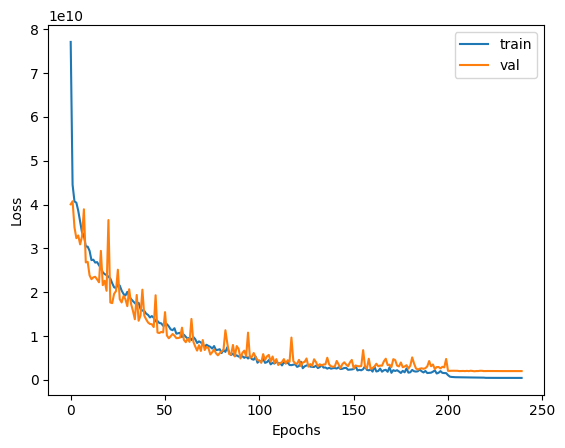

In [76]:
epochs = np.arange(0,240)

plt.plot(epochs,dfhist['loss'],label= 'train')
plt.plot(epochs,dfhist['val_loss'], label = 'val')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel('Loss')

Text(0, 0.5, 'mape')

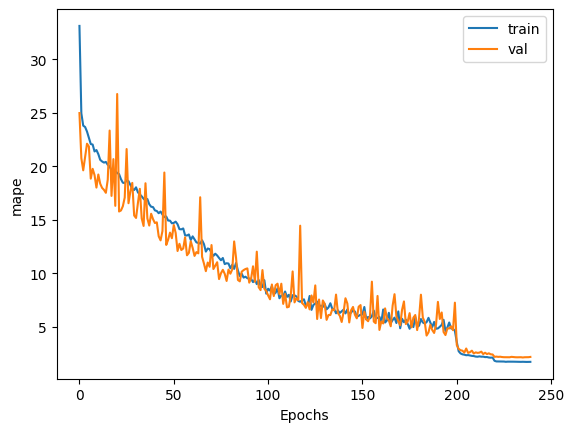

In [77]:
epochs = np.arange(0,240)

plt.plot(epochs,dfhist['mape'],label= 'train')
plt.plot(epochs,dfhist['val_mape'], label = 'val')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel('mape')

### Performance with xgboost

* Try xgboost first with default parameters

In [78]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV 

In [79]:
xgb = XGBRegressor(random_state = 1)

xgb.fit(Xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [80]:
trainperf['Default xgboost'] = compute_perf(ytrain, xgb.predict(Xtrain))

valperf['Default xgboost'] =compute_perf(yval, xgb.predict(Xval))

Train performance  {'r2': 0.9947258379935502, 'MAPE [%]': 2.8151210149374806, 'MAE': 13465.042539419328, 'MSE': 644612096.7752892}
Train performance  {'r2': 0.9839398819137257, 'MAPE [%]': 2.9639509780757884, 'MAE': 16289.63713743094, 'MSE': 1794340339.8654683}


* use grid search with cross validation to find reaonable hyper-parameters
* in the grid search allow variation in key hyperparameters such as max depth, n_estimators and learning rate

In [81]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.score))
    print('Best Parameters: ' + str(classifier.best_params_))

xgb = XGBRegressor(random_state = 1)

param_grid = {
    'n_estimators': [600,700,800,900,1000],
    #'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [3,4,5,6],
    'reg_alpha': [1],
    #'reg_lambda': [2, 5, 10],
    #'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.1,0.2,0.3,0.4],
    #'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_reg_xgb = clf_xgb.fit(Xtrain,ytrain)
clf_performance(best_reg_xgb,'XGB')


Fitting 5 folds for each of 80 candidates, totalling 400 fits
XGB
Best Score: <bound method BaseSearchCV.score of GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    m

In [82]:
clf_performance(best_reg_xgb,'XGB')


XGB
Best Score: <bound method BaseSearchCV.score of GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                  

In [83]:
best_reg_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 0.01,
 'n_estimators': 1000,
 'reg_alpha': 1,
 'sampling_method': 'uniform'}

In [84]:
trainperf['Best xgboost'] = compute_perf(ytrain, best_reg_xgb.predict(Xtrain))

valperf['Best xgboost'] =compute_perf(yval, best_reg_xgb.predict(Xval))

Train performance  {'r2': 0.9984811222809126, 'MAPE [%]': 0.6639758625239882, 'MAE': 2630.23139036772, 'MSE': 185638391.47316697}
Train performance  {'r2': 0.985865955848091, 'MAPE [%]': 1.1175457993781845, 'MAE': 6822.2021840469615, 'MSE': 1579146893.6262004}


In [85]:
index = list(trainperf.keys())

In [86]:
index

['Linear reg.',
 'grad boosting reg.',
 'MLP reg.',
 'Default xgboost',
 'Best xgboost']

### Try ensemble approach

In [87]:
ypred = (best_reg_xgb.predict(Xtrain)+ model.predict(Xtrain).flatten())/2

trainperf['xgboost + DNN'] = compute_perf(ytrain, ypred)

ypred = (best_reg_xgb.predict(Xval)+ model.predict(Xval).flatten())/2

valperf['xgboost + DNN'] = compute_perf(yval, ypred)

538/538 [==============================] - 0s 542us/step
Train performance  {'r2': 0.997909540675417, 'MAPE [%]': 1.1211514589716092, 'MAE': 4245.587683459882, 'MSE': 255497530.56409287}
29/29 [==============================] - 0s 648us/step
Train performance  {'r2': 0.9889148246559314, 'MAPE [%]': 1.4492128272910036, 'MAE': 7961.07648480663, 'MSE': 1238507536.9616308}


### Comparison of model performances for train and val

In [88]:
index = list(trainperf.keys())

In [89]:
data =[]
for i in index:
    data.append(trainperf[i])
    

In [90]:
dftrain = pd.DataFrame(data,index=index)

In [91]:
data =[]
for i in index:
    data.append(valperf[i])
    

dfval = pd.DataFrame(data,index=index)

In [92]:
labels = list(dfval.index)
x = np.arange(0,len(labels))

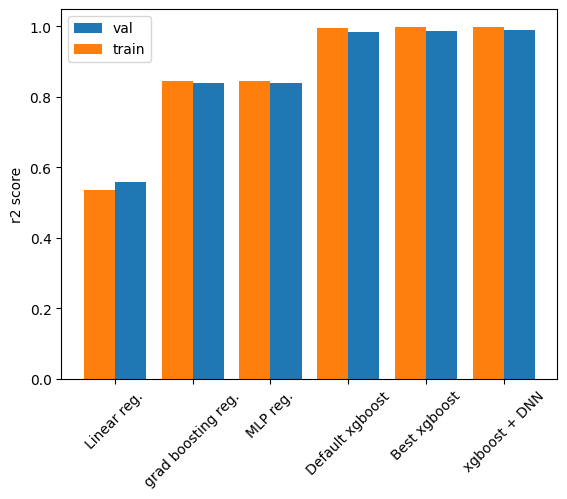

In [93]:
plt.bar(x=x +0.2,height=dfval.r2, width=0.4, label='val')
plt.bar(x=x-0.2,height=dftrain.r2, width=0.4, label='train')
plt.xticks(x, labels)
plt.xticks(rotation=45)
plt.ylabel('r2 score')
plt.legend()

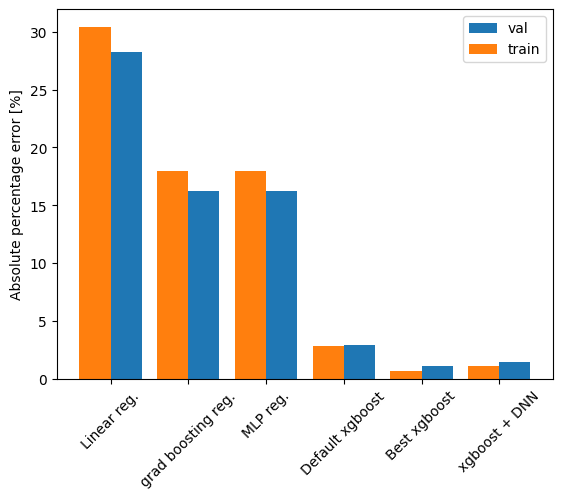

In [104]:
plt.bar(x=x +0.2,height=dfval['MAPE [%]'], width=0.4, label='val')
plt.bar(x=x-0.2,height=dftrain['MAPE [%]'], width=0.4, label='train')
plt.xticks(x, labels)
plt.xticks(rotation=45)
plt.ylabel('Absolute percentage error [%]')
plt.legend()
plt.savefig('abs_percentage_models.png',dpi=300)

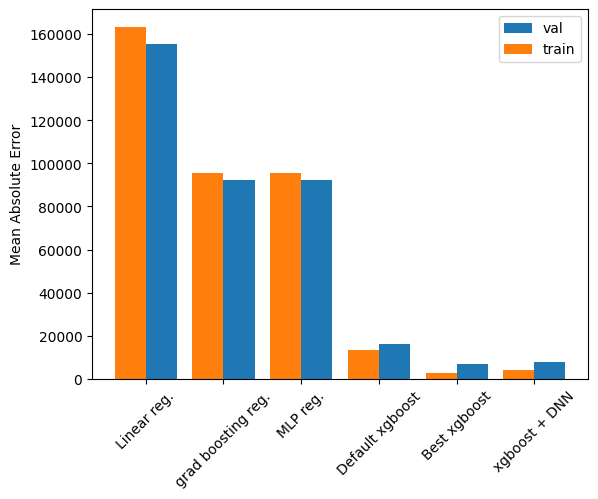

In [95]:
plt.bar(x=x +0.2,height=dfval['MAE'], width=0.4, label='val')
plt.bar(x=x-0.2,height=dftrain['MAE'], width=0.4, label='train')
plt.xticks(x, labels)
plt.xticks(rotation=45)
plt.ylabel('Mean Absolute Error')
plt.legend()

## Final model performance

In [112]:
compute_perf(ytrain, best_reg_xgb.predict(Xtrain))

compute_perf(yval, best_reg_xgb.predict(Xval), 'Val')

compute_perf(ytest, best_reg_xgb.predict(Xtest), 'Test')

Train performance  {'r2': 0.9984811222809126, 'MAPE [%]': 0.6639758625239882, 'MAE': 2630.23139036772, 'MSE': 185638391.47316697}
Val performance  {'r2': 0.985865955848091, 'MAPE [%]': 1.1175457993781845, 'MAE': 6822.2021840469615, 'MSE': 1579146893.6262004}
Test performance  {'r2': 0.9935359022667085, 'MAPE [%]': 0.773733664974334, 'MAE': 4515.997581650053, 'MSE': 788328820.7859551}


{'r2': 0.9935359022667085,
 'MAPE [%]': 0.773733664974334,
 'MAE': 4515.997581650053,
 'MSE': 788328820.7859551}

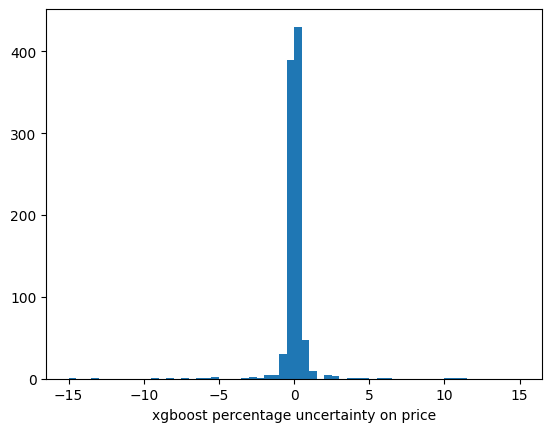

In [110]:
plt.hist(100*(best_reg_xgb.predict(Xtest)-ytest)/ytest, bins=60, range=(-15,15))
plt.xlabel('xgboost percentage uncertainty on price')
plt.savefig('xgboost_perf.png', dpi = 300)

30/30 [==============================] - 0s 737us/step


Text(0.5, 0, 'DNN percentage uncertainty on price')

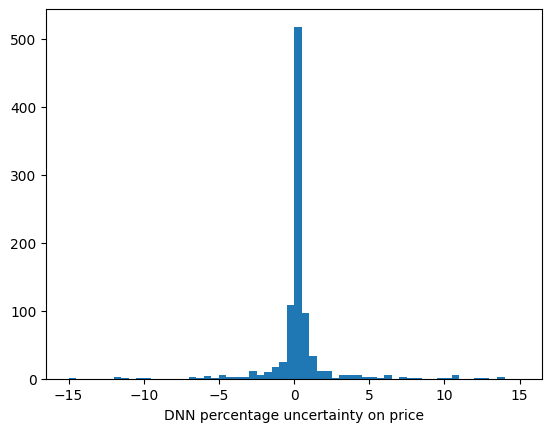

In [100]:
plt.hist(100*(model.predict(Xtest).flatten()-ytest)/ytest, bins=60, range=(-15,15))
plt.xlabel('DNN percentage uncertainty on price')

<Axes: >

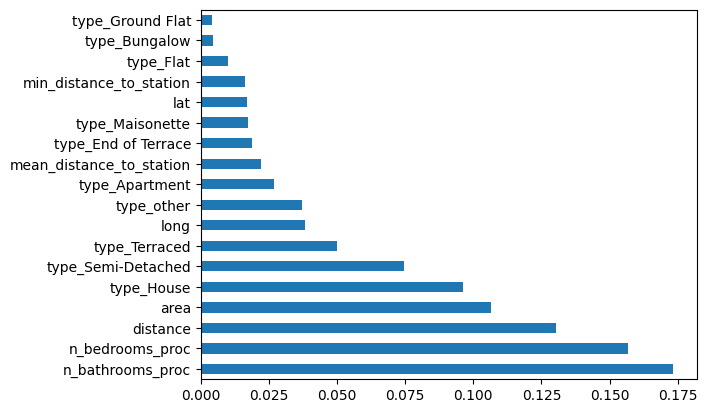

In [105]:
# Most important featrures for xgboost
xgb = XGBRegressor(random_state = 1)
xgb.fit(Xtrain,ytrain)

feat_importances = pd.Series(xgb.feature_importances_, index=pd.get_dummies(dffinal).columns)
feat_importances.nlargest(20).plot(kind='barh')

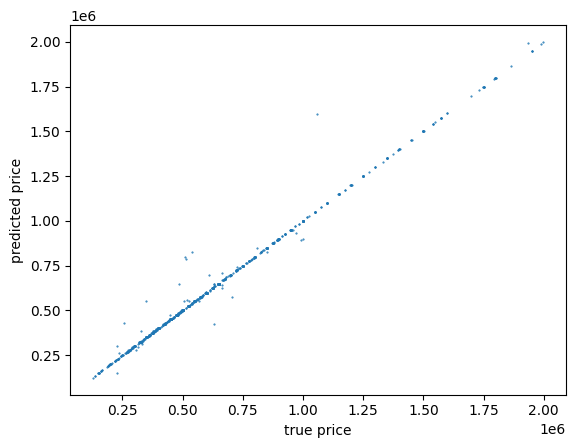

In [109]:
import matplotlib.pyplot as plt
plt.scatter(best_reg_xgb.predict(Xtest),ytest)
plt.xlabel('true price')
plt.ylabel('predicted price')
plt.savefig('predict_vs_true.png', dpi=300)

30/30 [==============================] - 0s 808us/step


Text(0, 0.5, 'predicted price')

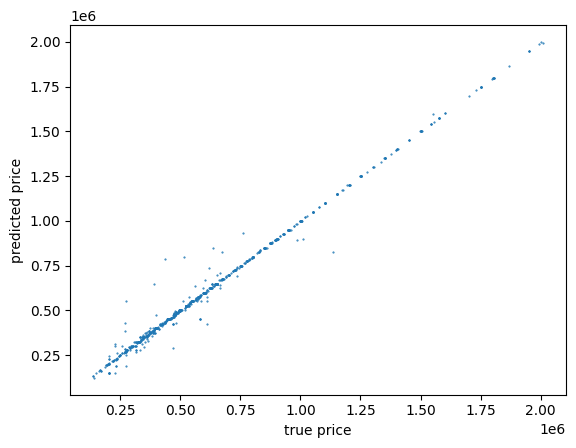

In [107]:
import matplotlib.pyplot as plt
plt.scatter(model.predict(Xtest).flatten(),ytest)
plt.xlabel('true price')
plt.ylabel('predicted price')